#**Neural network classification in PyTorch**

Classification is a of whether something is one thing or another (there can be multiple things as the options).

# 1. Making classification data and get it ready

In [17]:
import sklearn

In [18]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [19]:
len(X), len(y)

(1000, 1000)

In [20]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [21]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [22]:
# data explorations
# making dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


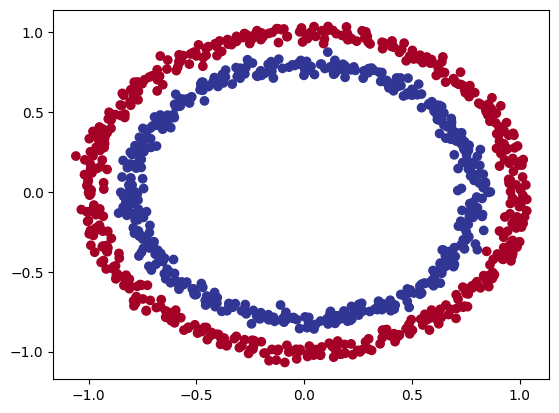

In [23]:
# visualization
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

# 1.1 Check input and output shapes

In [24]:
X.shape, y.shape

((1000, 2), (1000,))

In [25]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [26]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape of X_sample: {X_sample.shape} and shape of y_sample: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape of X_sample: (2,) and shape of y_sample: ()


# 1.2 Turn data into tensors and create train and test splits

In [27]:
import torch
torch.__version__

'2.6.0+cu124'

In [28]:
type(X)

numpy.ndarray

In [29]:
# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [30]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [31]:
type(X),X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [32]:
# splitting data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)



In [33]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [34]:
n_samples

1000

In [35]:
X_train.shape

torch.Size([800, 2])

# 2. Building a model

Let's build a model to classify our blue and red dots

To do so, we want to:

1. Setup device agonistic code so our code will run on an accelarator (GPU) if there is one.
2. Construct a model (by subclassing nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop

In [36]:
# import PyTorch and nn
import torch
from torch import nn

#make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic codes. Let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create two `nn.Module` layers that are capable of handling the shapes of our data.
3. Defines a `forwar()` method that outlines the forward pass (or forward computation)
4. Instatiate an instance of our model class and send it to the target device

In [37]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [38]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create two nn.Linear layers capable of handling the shapes of our data
    self.linear_layer_1 = nn.Linear(in_features=2,
                                     out_features=5)    # takes in 2 features and upscales to 5 features(More features, more opportunities for the model to learn more patterns in the data)

    self.linear_layer_2 = nn.Linear(in_features=5,
                                     out_features=1) #takes in 5 features from previous layer and outputs a single feature (same shape as 'y')
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features = 2, out_features =5), # Changed nn.linear to nn.Linear
    #     nn.Linear(in_features = 5, out_features =1)
    # )

# 3. Define a forward method that outlines the forward pass
  def forward(self, x):
    return self.linear_layer_2(self.linear_layer_1(x))
    # x -> layer_1 -> layer_2
    # return self.two_linear_layers(x)

# 4.Instatiate an instance of our model class and send it to the target device
model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (linear_layer_1): Linear(in_features=2, out_features=5, bias=True)
  (linear_layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [39]:
device

'cuda'

In [40]:
next(model_0.parameters()).device

device(type='cuda', index=0)

# Let's replicate the model above using nn.Sequential

In [41]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=5),
    nn.Linear(in_features=5,
              out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [42]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [43]:
# make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}")
print(f"Shape of predictions: {untrained_preds.shape}")
print(f"\nLength of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nfirst 10 predictions: {untrained_preds[:10]}")
print(f"\nfirst 10 test labels: {y_test[:10]}")


Length of predictions: 200
Shape of predictions: torch.Size([200, 1])

Length of test samples: 200, Shape: torch.Size([200, 2])

first 10 predictions: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]], device='cuda:0')

first 10 test labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


# 2.1 Setup loss function and optimizer

* Which loss function or optimizer should you use?
Again... this is problem specific.
For example,
* For **regression** you might want **MAE** or **MSE** (mean absolute error or mean squared error)
* For **classification** you might want **binary cross entropy** or **categorical cross entropy** (cross entropy)


As a reminder, **loss function** *measures* how wrong your model's predictions are.


* And for optimizers, two of the most common and useful are SGD and Adam

* For the loss function, we're going to use `torch.nn.BCEWithLogitsLoss()`


In [44]:
# Setup the loss function

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss has sigmoid activation function built in

# or if we use BCELoss():
# loss_fn = nn.BCELoss()
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )

# Setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [45]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

# Calculate accuracy
Accuracy = [True Positive / (True Positive+True Negative)]*100.

In [46]:
def accuracy_fn(y_true, y_pred):
    # Compare true labels with predicted labels
    correct = torch.eq(y_true, y_pred).sum().item()
    # Calculate accuracy percentage
    acc = (correct / len(y_pred)) * 100
    return acc

# 3. Training the model
We're gonna need to build a training loop.
Training loop:
1. Forward pass - The model goes through all of the training data once, performing its `forward()` function calculations `(model(x_train))`.
2. Calculate the loss - The model's outputs `(predictions)` are compared to the ground truth and evaluated to see how wrong they are `(loss = loss_fn(y_pred, y_train)`.
3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).
4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with `requires_grad=True`). This is known as backpropagation, hence "backwards" (`loss.backward()`).
5. Step the optimizer (gradient descent) - Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them (`optimizer.step()`).

# 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**

**Understanding Logits**  
*(For Classification Models)*  

**What Are Logits?**  
Logits are raw, unprocessed numerical outputs from a neural network **before applying activation functions** (like softmax or sigmoid). They represent the model's "confidence scores" for each possible class.  

---

**Key Features:**  
- 📊 **Unnormalized Scores**: Not probabilities (can be negative, positive, or >1).  
- 🔍 **Relative Confidence**: Higher values = higher confidence in a class.  
- 🎯 **Basis for Predictions**: Converted to probabilities (0-1 range) using activation functions.  

---

**Example:**  
For a model classifying images into **Cat**, **Dog**, or **Bird**:  
- **Logits**: `[3.2, -1.0, 2.5]` → Raw scores for each class.  
- **Probabilities**: After softmax → `[0.85, 0.02, 0.13]` (sum to 1).  
- **Prediction**: "Cat" (highest logit/probability).  

---

**Why Use Logits?**  
1. **Training Stability**: Loss functions (e.g., cross-entropy) work better with logits.  
2. **Flexibility**: Lets you choose how to interpret outputs (probabilities vs. class labels).  
3. **Avoid Premature Decisions**: Probabilities force values into 0-1 early; logits preserve relative scores.  

---

**Logits → Predictions Workflow:**  
1. **Raw Logits**: `[3.2, -1.0, 2.5]`  
2. **Activation**: Apply softmax → probabilities.  
3. **Final Prediction**: `argmax()` to select class with highest probability.  

---

**Common Confusions:**  
- ❌ **Logits ≠ Probabilities**: Logits are unnormalized scores.  
- ❌ **Logits ≠ Final Output**: Must process them to get predictions.  

---

**Real-World Analogy:**  
Think of logits as **exam scores**:  
- Raw scores: `[85, 60, 92]` → Logits (unnormalized).  
- Percentages: `[35%, 25%, 40%]` → Probabilities (after softmax).  
- Highest score: Predicted class (e.g., "A" grade).  

---

**Key Takeaway:**  
Logits are the model’s "gut feeling" about classes, which you convert into actionable predictions using activation functions.


In [47]:
# view the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [48]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [49]:
# Use the sigmoid activation function to our model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
 * `y_pred_probs` >= 0.5  -> `y = 1` (Class 1)
 * `y_pred_probs` < 0.5  -> `y = 0` (Class 0)


In [50]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds[:5]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [51]:
# in full (logits -> pred probs -> pred labels)
y_preds = torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_preds[:5]

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0', grad_fn=<SliceBackward0>)

In [52]:
# check for equality
torch.eq(y_preds.squeeze(), y_test.to(device).squeeze())
# Move y_test to the same device as y_preds

tensor([False,  True,  True,  True,  True,  True, False, False,  True,  True,
         True, False, False,  True, False,  True,  True,  True, False,  True,
         True, False, False,  True, False, False, False, False, False,  True,
         True, False,  True,  True,  True,  True, False,  True,  True,  True,
        False,  True,  True, False,  True,  True, False,  True,  True,  True,
         True,  True, False, False,  True, False,  True,  True, False,  True,
         True, False,  True,  True, False, False,  True, False,  True, False,
         True, False,  True,  True,  True,  True,  True, False,  True,  True,
         True, False, False,  True, False,  True, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True, False,  True, False, False,  True,
        False, False, False,  True,  True, False,  True, False,  True, False,
        False, False, False, False,  True, False,  True,  True, 

In [53]:
# get rid of extra dimensions
y_preds.squeeze()

tensor([0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
        0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

# 3.2 Building a training and testing loop


In [54]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits into prediction probabilities and then into prediction labels


  #  2. Calculate loss/accuracy
  # loss = loss_fn( #nn.BCELoss expects predictions probabilities as inputs
  #     torch.sigmoid(y_logits),
  #     y_train
  # )
  loss = loss_fn( #nn.BCEWithLogitLoss expects raw logits as inputs
      y_logits,
      y_train
  )
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred
  )

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  # testing
  model_0.eval()
  with torch.inference_mode():
    # 1.Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/accuracy
    test_loss = loss_fn(
        test_logits,
        y_test
    )
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test Loss: 0.69440, Test Acc: 58.00%
Epoch: 100 | Loss: 0.69331, Acc: 49.25% | Test Loss: 0.69271, Test Acc: 53.00%
Epoch: 200 | Loss: 0.69310, Acc: 50.88% | Test Loss: 0.69336, Test Acc: 49.00%
Epoch: 300 | Loss: 0.69304, Acc: 51.12% | Test Loss: 0.69376, Test Acc: 46.50%
Epoch: 400 | Loss: 0.69301, Acc: 51.25% | Test Loss: 0.69403, Test Acc: 47.50%
Epoch: 500 | Loss: 0.69299, Acc: 50.88% | Test Loss: 0.69423, Test Acc: 47.00%
Epoch: 600 | Loss: 0.69299, Acc: 51.25% | Test Loss: 0.69436, Test Acc: 46.50%
Epoch: 700 | Loss: 0.69298, Acc: 51.25% | Test Loss: 0.69446, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.50% | Test Loss: 0.69453, Test Acc: 45.50%
Epoch: 900 | Loss: 0.69298, Acc: 51.38% | Test Loss: 0.69458, Test Acc: 45.00%


[link text](https://)# 4. Make predictions and evaluate the model

from the metrics, it looks like our model isn't learning anything. So, to inspect it, let's make some predictions and visualize them.

To do so, we're gonna import a function called `plot_decision_boundary()`

**Plot Decision Boundary এর কাজ কী?**

একটি **Decision Boundary** (সিদ্ধান্ত সীমানা) হল মেশিন লার্নিং মডেলের একটি ভিজ্যুয়াল উপস্থাপনা যা দেখায় কিভাবে মডেলটি বিভিন্ন ক্লাস বা ক্যাটেগরিকে আলাদা করে। এটি প্রধানত ক্লাসিফিকেশন সমস্যায় ব্যবহার হয়। নিচে এর কাজ ও গুরুত্ব বর্ণনা করা হল:

1. **মডেলের সিদ্ধান্ত বোঝা**:  
   ডিসিশন বাউন্ডারি প্লট করে দেখা যায় মডেলটি ডেটা পয়েন্টগুলিকে কীভাবে বিভক্ত করছে। উদাহরণস্বরূপ, লজিস্টিক রিগ্রেশনে একটি সরল রেখা (লিনিয়ার বাউন্ডারি) ব্যবহার করে, অন্যদিকে SVM বা ডিসিশন ট্রি জটিল (নন-লিনিয়ার) বাউন্ডারি তৈরি করতে পারে।

2. **মডেল পারফরম্যান্স মূল্যায়ন**:  
   বাউন্ডারি দেখলে বোঝা যায় মডেলটি **ওভারফিটিং** (প্রশিক্ষণ ডেটাকে অতিরিক্ত মেমোরাইজ করা) নাকি **আন্ডারফিটিং** (সরল মডেল) করছে। খুব জটিল বাউন্ডারি ওভারফিটিং, আর খুব সরল বাউন্ডারি আন্ডারফিটিং নির্দেশ করে।

3. **হাইপারপ্যারামিটার টিউনিং**:  
   বিভিন্ন প্যারামিটার (যেমন SVM-এর `C` বা নিউরাল নেটওয়ার্কের লেয়ার) পরিবর্তন করলে বাউন্ডারি কীভাবে পরিবর্তিত হয় তা পর্যবেক্ষণ করে মডেলটি অপ্টিমাইজ করা যায়।

4. **ডেটা প্যাটার্ন বিশ্লেষণ**:  
   ডেটা যদি লিনিয়ার বা নন-লিনিয়ারভাবে বিভক্ত হয়, ডিসিশন বাউন্ডারি তা চিহ্নিত করতে সাহায্য করে। যেমন, বৃত্তাকার ডেটার জন্য SVM পলিনোমিয়াল কার্নেল ব্যবহার করা যেতে পারে।

5. **মডেল তুলনা**:  
   বিভিন্ন অ্যালগরিদম (যেমন লজিস্টিক রিগ্রেশন vs. K-NN) এর বাউন্ডারি তুলনা করে কোন মডেল ডেটার জন্য ভালো কাজ করছে তা বোঝা যায়।

---

**কিভাবে প্লট করা হয়?**  
২ডি ডেটার ক্ষেত্রে:
1. ফিচার স্পেসে গ্রিড পয়েন্ট তৈরি করুন।
2. প্রতিটি পয়েন্টের জন্য মডেলের প্রেডিকশন নিন।
3. কনটুর প্লট (contour plot) ব্যবহার করে বাউন্ডারি দেখান।

**উদাহরণ**:  
- **লিনিয়ার মডেল**: সরল রেখা।  
- **নন-লিনিয়ার মডেল** (যেমন SVM, ডিসিশন ট্রি): বাঁকা বা স্টেপ-লাইক সীমানা।

**সীমাবদ্ধতা**:  
উচ্চ-ডাইমেনশনাল ডেটার ক্ষেত্রে ভিজ্যুয়ালাইজেশন কঠিন, তাই PCA বা t-SNE ব্যবহার করে ডাইমেনশন কমাতে হয়।

**সংক্ষেপে**, ডিসিশন বাউন্ডারি প্লট করা মডেলের আচরণ, দক্ষতা ও বিশ্বাসযোগ্যতা বোঝার জন্য একটি শক্তিশালী টুল!

In [55]:
import requests
from pathlib import Path

# download helper functions from learn pyTorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

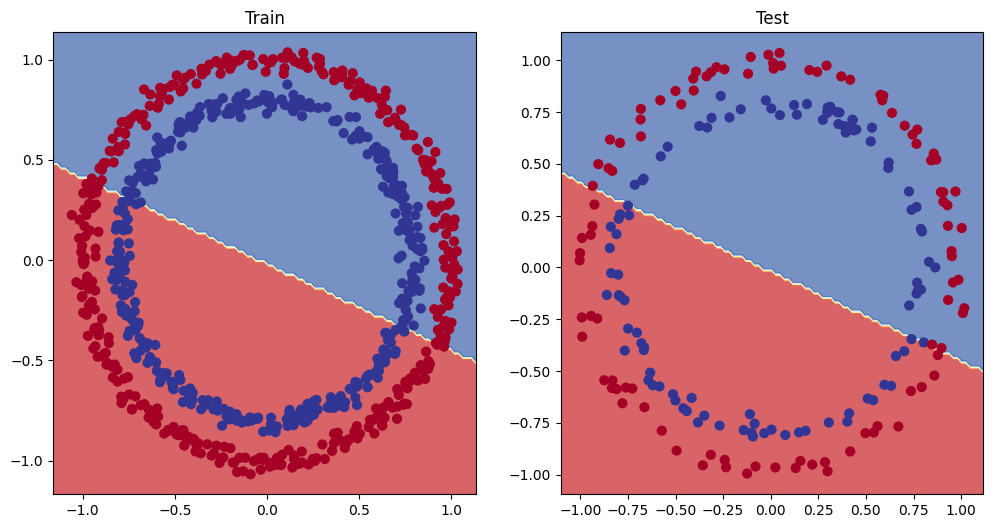

In [56]:
# plot decision boundary of a model

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units (e.g., going from 5 hidden units to 10 hidden units)
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And Because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **Hyperparameters**



In [57]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0796, -0.2678],
                      [ 0.4837, -0.4847],
                      [-0.3285, -0.1960],
                      [-0.4351,  0.0318],
                      [-0.6787,  0.6935]])),
             ('0.bias', tensor([-0.6069,  0.5210,  0.1150, -0.2191,  0.4239])),
             ('1.weight',
              tensor([[ 0.0331,  0.2036, -0.0446, -0.1426,  0.2221]])),
             ('1.bias', tensor([-0.2053]))])

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [58]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [59]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z
    # or
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelv1().to(device)
model_1

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [60]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [61]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)


In [62]:
# write a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)



In [63]:
# set the number of epochs
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)



In [64]:
# write a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 1000

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# **Move model_1 to the target device after defining it**
model_1 = model_1.to(device)

# build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze() # X_train is now on the correct device.
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities ->predicition labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train) # y_train is now on the correct device.
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (back propagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze() # X_test is now on the correct device.
    test_pred = torch.round(torch.sigmoid(test_logits)) # for binary claasification

    # 2. Calculate loss
    test_loss = loss_fn(test_logits, y_test) # y_test in now on the correct device.
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

# Print out what's heppenin'
if epoch % 100 == 0:
  print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

In [65]:
device

'cuda'

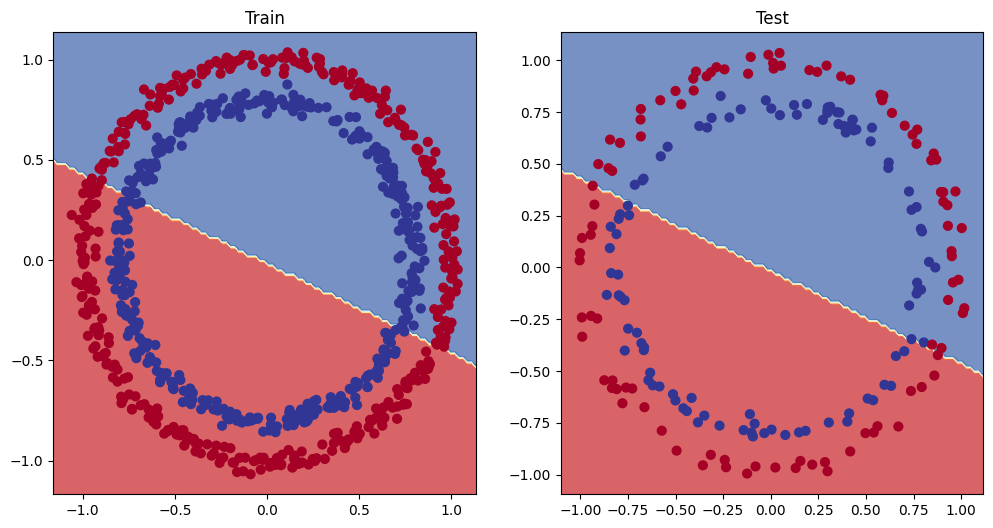

In [66]:
# plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [67]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [68]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# check the length of each
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

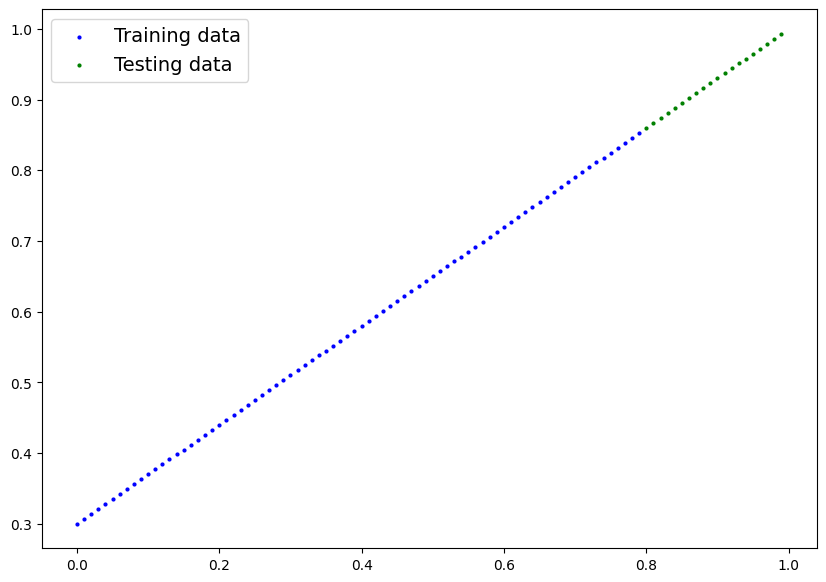

In [69]:
plot_predictions(train_data = (X_train_regression),
                 train_labels = (y_train_regression),
                 test_data = (X_test_regression),
                 test_labels = (y_test_regression),
                 predictions = None);


In [70]:
model_1

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [71]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### 5.2 Adjusting `model_1` to fit a straight line

In [72]:
# Same architechture as model_1 (but using nn.Sequential())

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [73]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [74]:
# train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epoch = 100

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training loop
for epoch in range(epochs):
  ### Training
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  ### Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986, Test Loss: 0.91103
Epoch: 10 | Loss: 0.40240, Test Loss: 0.50474
Epoch: 20 | Loss: 0.06007, Test Loss: 0.10151
Epoch: 30 | Loss: 0.01559, Test Loss: 0.03231
Epoch: 40 | Loss: 0.03092, Test Loss: 0.00111
Epoch: 50 | Loss: 0.03196, Test Loss: 0.00108
Epoch: 60 | Loss: 0.03192, Test Loss: 0.00170
Epoch: 70 | Loss: 0.03081, Test Loss: 0.00097
Epoch: 80 | Loss: 0.03077, Test Loss: 0.00150
Epoch: 90 | Loss: 0.02967, Test Loss: 0.00092
Epoch: 100 | Loss: 0.02858, Test Loss: 0.00081
Epoch: 110 | Loss: 0.02962, Test Loss: 0.00197
Epoch: 120 | Loss: 0.02748, Test Loss: 0.00091
Epoch: 130 | Loss: 0.02852, Test Loss: 0.00181
Epoch: 140 | Loss: 0.02850, Test Loss: 0.00246
Epoch: 150 | Loss: 0.02744, Test Loss: 0.00169
Epoch: 160 | Loss: 0.02638, Test Loss: 0.00123
Epoch: 170 | Loss: 0.02637, Test Loss: 0.00162
Epoch: 180 | Loss: 0.02532, Test Loss: 0.00125
Epoch: 190 | Loss: 0.02636, Test Loss: 0.00284
Epoch: 200 | Loss: 0.02533, Test Loss: 0.00209
Epoch: 210 | Loss: 0.025

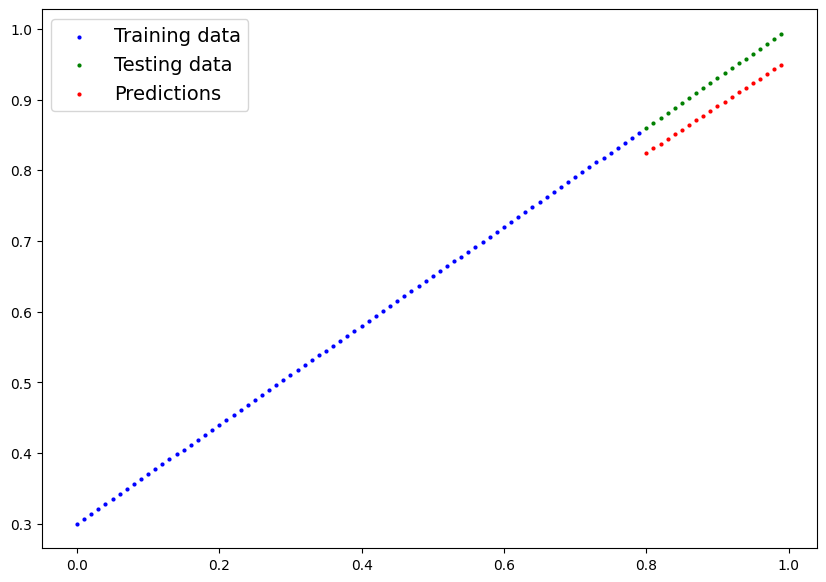

In [75]:
# Turn on evaluation mode
model_2.eval()

# Create predictions (move to CPU before plotting)
with torch.inference_mode():
    y_preds = model_2(X_test_regression).cpu()  # Added .cpu() here

# plot data and predictions (move tensors to CPU before plotting)
plot_predictions(train_data=X_train_regression.cpu(),  # Added .cpu()
                 train_labels=y_train_regression.cpu(),  # Added .cpu()
                 test_data=X_test_regression.cpu(),  # Added .cpu()
                 test_labels=y_test_regression.cpu(),  # Added .cpu()
                 predictions=y_preds)

## 6. The missing piece: non-linearity

### 6.1 Recreating non-linear data (red and blue circles)

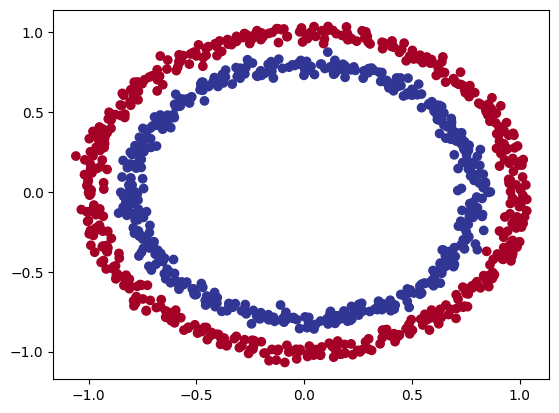

In [76]:
# make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)


In [77]:
# Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## 6.2 Building a model with non linearity

In [78]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [79]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)


In [80]:
# Set manual seeds for reproducibility (ensures consistent results across runs)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of training epochs
epochs = 1000

# Move training/test data to target device (GPU/CPU)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# **Move model_3 to the target device after defining it**
model_3 = model_3.to(device)  # Ensures the model is on the correct device

# Training loop
for epoch in range(epochs):
    ### Training Phase ###
    model_3.train()  # Set model to training mode (enables gradient tracking)

    # 1. Forward Pass: Compute model's raw output (logits)
    y_logits = model_3(X_train).squeeze()  # Squeeze removes extra dimensions (e.g., [batch, 1] → [batch])
    y_pred = torch.round(torch.sigmoid(y_logits))  # Convert logits → probabilities → binary predictions (0/1)

    # 2. Calculate loss (BCEWithLogitsLoss combines sigmoid + BCE loss, more numerically stable)
    loss = loss_fn(y_logits, y_train)
    # Calculate accuracy (custom function)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # 3. Clear previous gradients to avoid accumulation
    optimizer.zero_grad()

    # 4. Backpropagation: Compute gradients of loss w.r.t. model parameters
    loss.backward()

    # 5. Update model parameters using optimizer (e.g., SGD, Adam)
    optimizer.step()

    ###Testing
    model_3.eval()  # Set model to evaluation mode (disables gradient tracking)
    with torch.inference_mode():
        # 1. Forward Pass: Compute model's raw output (logits)
        test_logits = model_3(X_test).squeeze()  # Squeeze removes extra dimensions (e.g., [batch, 1] → [batch])
        test_pred = torch.round(torch.sigmoid(test_logits))  # Convert logits → probabilities → binary predictions (0/1)

        test_loss = loss_fn(test_logits, y_test)  # Calculate loss
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)  # Calculate accuracy


        #Print out what's happening
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


In [81]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01

### 6.4 Evaluating a model trained with non-linear activation functions

In [82]:
# making prediction
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

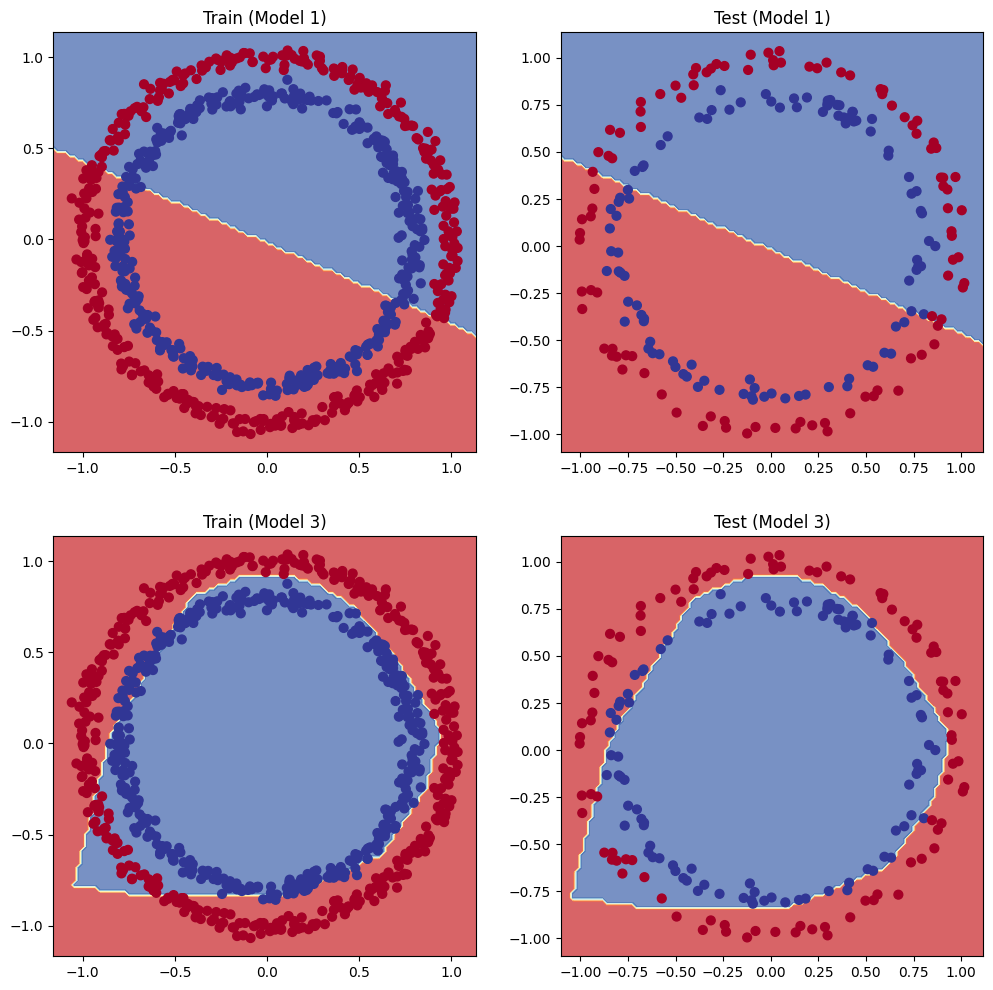

In [83]:
# Import necessary libraries (assumed to be already imported)
import matplotlib.pyplot as plt

# Create a figure with a 2x2 grid for all plots
plt.figure(figsize=(12, 12))

# First row: Model 1 (Train and Test)
plt.subplot(2, 2, 1)
plt.title("Train (Model 1)")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(2, 2, 2)
plt.title("Test (Model 1)")
plot_decision_boundary(model_1, X_test, y_test)

# Second row: Model 3 (Train and Test)
plt.subplot(2, 2, 3)
plt.title("Train (Model 3)")
plot_decision_boundary(model_3, X_train, y_train)

plt.subplot(2, 2, 4)
plt.title("Test (Model 3)")
plot_decision_boundary(model_3, X_test, y_test)

# Display the plots
plt.show()

## 7. Replicating non linear activation function

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patters in data and it tries to figure out the patterns on its own.

And these tools are linear and non linear functions


In [84]:
# Create a tensor to start with

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [85]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

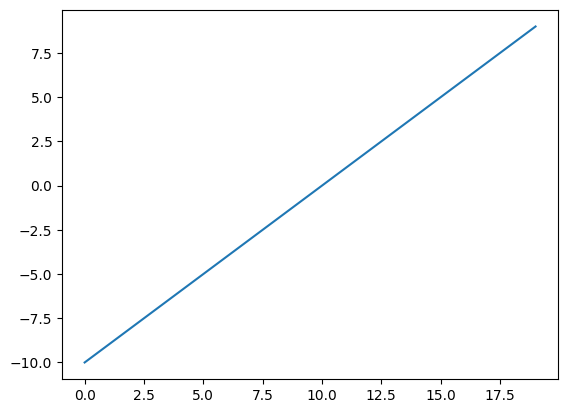

In [86]:
# Visualize the data
plt.plot(A);

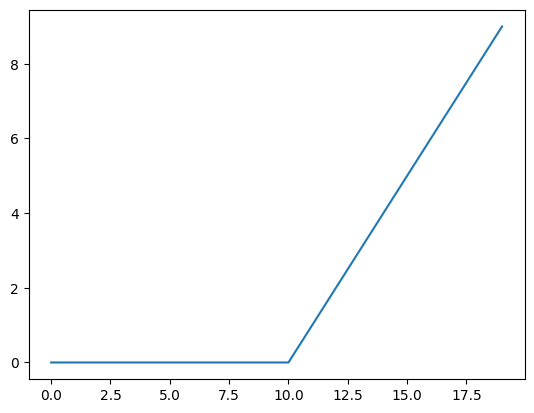

In [87]:
plt.plot(torch.relu(A));

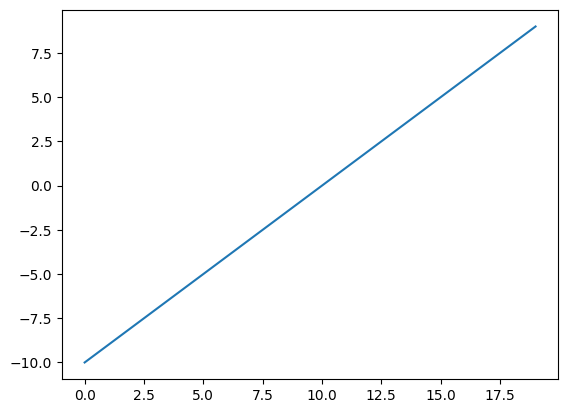

In [88]:
def linear_function(x):
  return x

plt.plot(linear_function(A));

In [89]:
# making a ReLU function
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

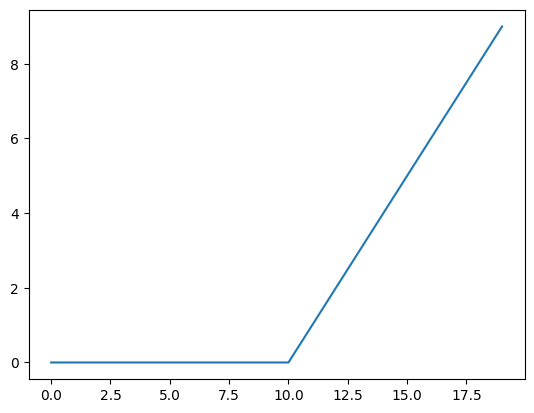

In [90]:
# plot our custom ReLU activation ffunction
plt.plot(relu(A));

In [91]:
# Now let's do the same for sigmoid

def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

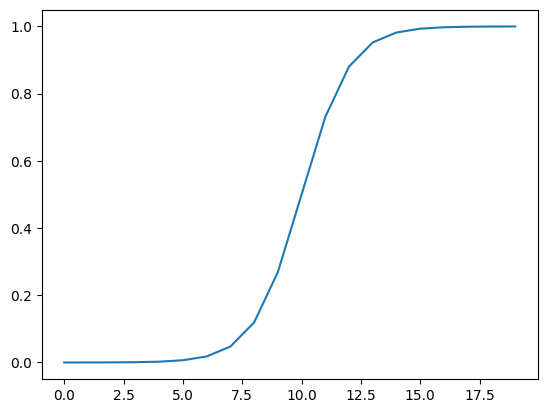

In [92]:
plt.plot(sigmoid(A));

## 8. Putting it all together with a **Multi-class classification** problem

* Binary classification = one thing or another (cat vs. dog, spam
vs. not spam, fraud or not fraud
* Multiclass classification = more than one thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multi-class dataset



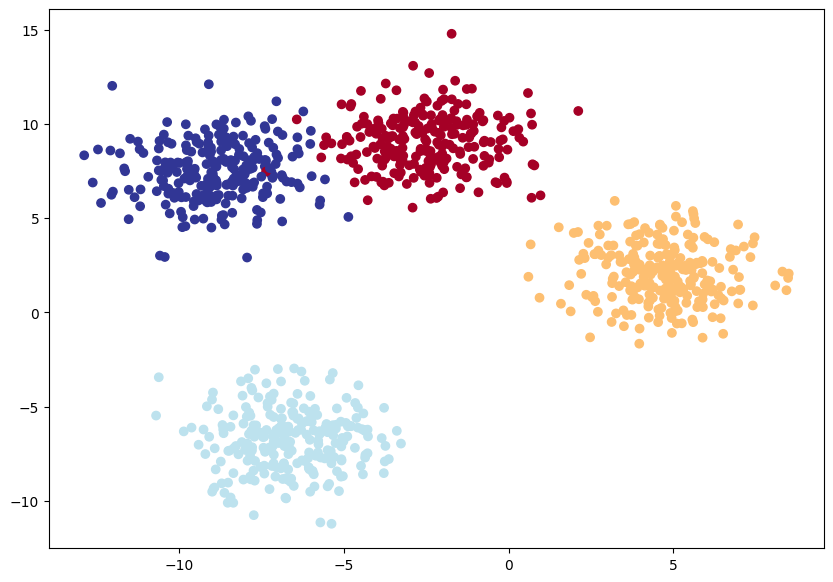

In [93]:
# Import dependencies

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the number of hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create the multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)


# 3. Split into training and testing data
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(
    X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

### 8.2 building a multiclass classification model in PyTorch

In [94]:
#DEVICE AGNOSTIC CODE
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [95]:
torch.unique(y_train_blob)

tensor([0., 1., 2., 3.])

so we have 4 classes

In [96]:
# build a multiclass classification model:
import torch.nn as nn
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units= 8): # changed out_features to output_features

   super().__init__()
   self.linear_layer_stack = nn.Sequential(
      nn.Linear(in_features = input_features, out_features = hidden_units),
      nn.ReLU(),
      nn.Linear(in_features = hidden_units, out_features = hidden_units),
      nn.ReLU(),
      nn.Linear(in_features = hidden_units, out_features = output_features) # changed out_features to output_features
  )

  def forward(self, x):
    return self.linear_layer_stack(x)
# Create an instance of the BlobModel and send an instance to the target device
# Now define the model outside the class
model_4 = BlobModel(
    input_features=2,
    output_features=4, # changed out_features to output_features
    hidden_units=8
).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multiclass classification problem


In [97]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### 8.4 Getting prediction probabilities

In order to evaluate and train our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.

`logtis`(raw output) -> `Pred Probs` (use `torch.softmax`) -> `Pred Labels`(take the argmax of the prediction probabilities)

In [98]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [99]:
X_test_blob.device

device(type='cpu')

In [100]:
# let's get some raw outputs of our model (logits)
with torch.inference_mode():
  y_logits = model_4(X_test_blob.to(device))
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [101]:
y_test_blob[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [102]:
# Convert our model's logit outputs to prediction probabilities
# for binary classfication, we used: sigmoid
# for multiclass classification, we'll use: softmax

y_pred_probs = torch.softmax(y_logits, dim=1)
y_logits[:10], y_pred_probs[:10]


(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0'),
 tensor([[0.3169, 0.3244, 0.1405, 0.2182],
         [0.3336, 0.1432, 0.2026, 0.3206],
         [0.3011, 0.1843, 0.2823, 0.2323],
         [0.3078, 0.2766, 0.1836, 0.2320],
         [0.3719, 0.1286, 0.1532, 0.3463],
         [0.3381, 0.1358, 0.1929, 0.3331],
         [0.2867, 0.1841, 0.2861, 0.2431],
         [0.3554, 0.1355, 0.1740, 0.3351],
         [0.3009, 0.1841, 0.2779, 0.2371],
         [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0'))

In [103]:
y_pred_probs[0], torch.sum(y_pred_probs[0])

(tensor([0.3169, 0.3244, 0.1405, 0.2182], device='cuda:0'),
 tensor(1., device='cuda:0'))

In [104]:
# Convert out model's prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [105]:
y_test_blob

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

### 8.5 Create a training and testing loop from a multi class PyTorch model



In [106]:
# fit the multi class model to the data

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 1000

# put data on target device
X_train_blob, y_train_blob = X_train_blob.to(device), y_train_blob.to(device)
X_test_blob, y_test_blob = X_test_blob.to(device), y_test_blob.to(device)
#changing the datatype of target(y) to long
y_train_blob = y_train_blob.type(torch.LongTensor).to(device) #change the datatype of y_train_blob to Long and move it to the device
y_test_blob = y_test_blob.type(torch.LongTensor).to(device) #change the datatype of y_test_blob to Long and move it to the device


# loop through data
for epoch in range(epochs):
  ### Training
  model_4.train()

  ###forward pass
  y_logits = model_4(X_train_blob)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,
                 y_train_blob)
  acc = accuracy_fn(y_true=y_train_blob,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ###testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test_blob)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits, y_test_blob)
    test_acc = accuracy_fn(y_true=y_test_blob,
                           y_pred=test_pred)
  # print out what's happening:
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.1588, Acc: 40.38% | Test Loss: 1.0755, Test Acc: 48.00%
Epoch: 100 | Loss: 0.0331, Acc: 99.25% | Test Loss: 0.0243, Test Acc: 99.50%
Epoch: 200 | Loss: 0.0266, Acc: 99.25% | Test Loss: 0.0165, Test Acc: 99.50%
Epoch: 300 | Loss: 0.0250, Acc: 99.25% | Test Loss: 0.0144, Test Acc: 99.50%
Epoch: 400 | Loss: 0.0243, Acc: 99.25% | Test Loss: 0.0134, Test Acc: 99.50%
Epoch: 500 | Loss: 0.0238, Acc: 99.25% | Test Loss: 0.0127, Test Acc: 99.50%
Epoch: 600 | Loss: 0.0234, Acc: 99.25% | Test Loss: 0.0122, Test Acc: 99.50%
Epoch: 700 | Loss: 0.0231, Acc: 99.25% | Test Loss: 0.0118, Test Acc: 99.50%
Epoch: 800 | Loss: 0.0228, Acc: 99.25% | Test Loss: 0.0115, Test Acc: 99.50%
Epoch: 900 | Loss: 0.0225, Acc: 99.25% | Test Loss: 0.0112, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with a PyTorch multi-class model

In [109]:
# make predictions

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_test_blob)
  y_pred_probs = torch.softmax(y_logits, dim=1)

y_logits[:10]

tensor([[ -3.5145,  12.8709, -10.6697, -12.0417],
        [ -1.5884, -10.7014,  -7.4130,   5.5363],
        [ -4.9569,  -5.3040,   5.8996,  -4.7773],
        [ -4.1685,   9.9087,  -5.9156,  -7.2674],
        [  7.2870,  -3.9915, -13.0512,  -8.3679],
        [ -2.5085, -12.7226,  -8.5212,   7.2769],
        [ -4.2990,  -4.4823,   5.1060,  -3.9813],
        [  6.3051,  -7.6551, -10.6488,  -4.0640],
        [ -6.4000,  -6.8924,   7.3538,  -6.1127],
        [  7.0524,  -6.8101, -11.1066,  -5.3453]], device='cuda:0')

In [110]:
y_pred_probs[:10]

tensor([[7.6542e-08, 1.0000e+00, 5.9764e-11, 1.5156e-11],
        [8.0430e-04, 8.8655e-08, 2.3759e-06, 9.9919e-01],
        [1.9278e-05, 1.3625e-05, 9.9994e-01, 2.3072e-05],
        [7.6977e-07, 1.0000e+00, 1.3415e-07, 3.4715e-08],
        [9.9999e-01, 1.2642e-05, 1.4697e-09, 1.5890e-07],
        [5.6263e-05, 2.0620e-09, 1.3770e-07, 9.9994e-01],
        [8.2296e-05, 6.8508e-05, 9.9974e-01, 1.1307e-04],
        [9.9997e-01, 8.6529e-07, 4.3352e-08, 3.1387e-05],
        [1.0636e-06, 6.5004e-07, 1.0000e+00, 1.4176e-06],
        [9.9999e-01, 9.5409e-07, 1.2991e-08, 4.1278e-06]], device='cuda:0')

In [111]:
y_test_blob

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [113]:
# go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

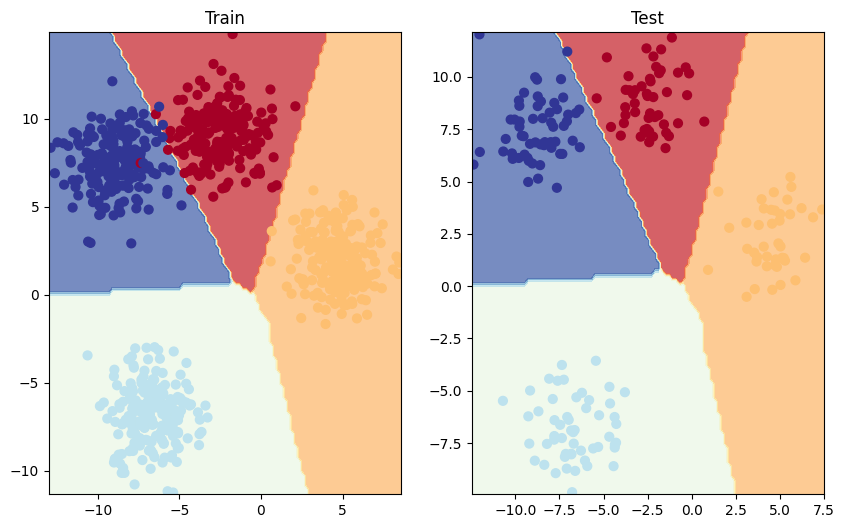

In [114]:
plt.figure(
    figsize=(10,6)
)
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_train_blob, y_train_blob)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_test_blob, y_test_blob)
plt.show()

## 9. A few more classification matrix ...(to evaluate our classification model)

* Accuracy - Out of 100 samples how many does our model get right?
* Precision
* Recall
* F1-scores
* Confusion matrix
* Classification report


In [115]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.9/960.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [118]:
from torchmetrics import Accuracy

# setup metric
torchmetrics_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_test_blob)

tensor(0.9950, device='cuda:0')